In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm

In [2]:
input_data = pd.read_csv('result.csv')

In [3]:
input_data

,stage,data,profile,ref,reco,top3,top5,top10,top15,top20
0,0,2022.5.8,"{id:""jennytestone@test.com"",divisions:[""Commer...",NaN,"[""GO1043"":2,""GO1755"":0,""GO1841"":1,""GO5459"":3,""...",66.67%,60.00%,60.00%,60.00%,60.00%
1,1,2022.5.8,"{id:""jennytestone@test.com"",divisions:[""Commer...","[""jennytesttwo@test.com"",""jennytestthree@test....","[""GO3141"":1,""GO1972"":1,""GO1043"":2,""GO4007"":0,""...",100.00%,80.00%,70.00%,73.33%,70.00%
2,0,2022.5.8,"{""id"":StageZero@anu.edu.au, ""divisions"": [""MED...",NaN,"[""GO1001"": 3, ""GO4515"":1, ""GO4503"":3,""GO4496"":...",100.00%,80.00%,90%,80.00%,85%
3,1,2022.5.8,"{""id"":StageZero@anu.edu.au, ""divisions"": [""MED...","[""StageOneHighA@anu.edu.au"", ""StageOneMidA@anu...","[""GO2863"": 2, ""GO5455"":2, ""GO1240"":0,""GO4481"":...",66.70%,80.00%,70.00%,73.33%,80.00%
4,0,2022.5.8,"""ID"": (Robert.B@anu.com ), ""divisions"": [ ""stu...",NaN,"[""go546"": 0, ""go4834"": 0, ""go1676"": 4, ""go4865...",33%,60%,50%,53%,87%
5,1,2022.5.8,"""ID"": (Robert.B@anu.com ), ""divisions"": [ ""stu...","[""Robert.A@anu.com"", ""Robert.C@anu.com"", ""Robe...","[""go4865"": 3, ""go4834"": 3, ""go3720"": 3, ""go173...",100%,100%,80%,73.33%,60%


In [4]:
input_data['profile'] = input_data['profile'].str.lower().copy()
input_data['profile'] = input_data['profile'].str.replace('"', '').copy()
input_data['profile'] = input_data['profile'].str.replace('(', '').copy()
input_data['profile'] = input_data['profile'].str.replace(')', '').copy()
input_data['user'] = input_data['profile'].map(lambda x: re.findall('id:(.*?)@', x)[0])

C:\Users\24966\AppData\Local\Temp/ipykernel_7864/2982703673.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  input_data['profile'] = input_data['profile'].str.replace('(', '').copy()
C:\Users\24966\AppData\Local\Temp/ipykernel_7864/2982703673.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  input_data['profile'] = input_data['profile'].str.replace(')', '').copy()


In [5]:
def get_list(row):
    return row.split(',')

In [6]:
input_data['tmp'] = input_data['reco'].map(get_list)

In [7]:
new_df = input_data.explode('tmp')

In [8]:
def get_list(row):
    value  =row.lower().split(':')
    return [re.findall('go(\d+)' ,value[0])[0], re.findall('(\d+)' ,value[1])[0]]

In [9]:
new_df['value'] = new_df['tmp'].map(get_list)

In [10]:
new_df['goid'] = new_df['value'].map(lambda x:x[0])
new_df['rate'] = new_df['value'].map(lambda x:x[1])

In [11]:
draw_df = new_df[['stage', 'user', 'goid', 'rate']]

In [12]:
div_df = new_df[['user', 'profile']]
div_df['divisions'] = div_df['profile'].map(lambda x: re.findall('divisions:\s*\[(.*?)\]', x))

C:\Users\24966\AppData\Local\Temp/ipykernel_7864/2057617114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  div_df['divisions'] = div_df['profile'].map(lambda x: re.findall('divisions:\s*\[(.*?)\]', x))


In [13]:
div_df = div_df[['user', 'divisions']]
div_df['divisions'] = div_df['divisions'].astype(str)
div_df['divisions'].unique()

array(["['commerce, management, tourism and services,economics']",
       "['medical and health sciences,psychology and cognitive sciences,biological sciences']",
       "[' studies in human society, language, communication and culture, studies in creative arts and writing']"],
      dtype=object)

In [14]:
div_df

,user,divisions
0,jennytestone,"['commerce, management, tourism and services,e..."
0,jennytestone,"['commerce, management, tourism and services,e..."
0,jennytestone,"['commerce, management, tourism and services,e..."
0,jennytestone,"['commerce, management, tourism and services,e..."
0,jennytestone,"['commerce, management, tourism and services,e..."
...,...,...
5,robert.b,"[' studies in human society, language, communi..."
5,robert.b,"[' studies in human society, language, communi..."
5,robert.b,"[' studies in human society, language, communi..."
5,robert.b,"[' studies in human society, language, communi..."


In [16]:
div_list = ['Business & Commerce','Health & Medical Studies','Arts, Society & Culture']

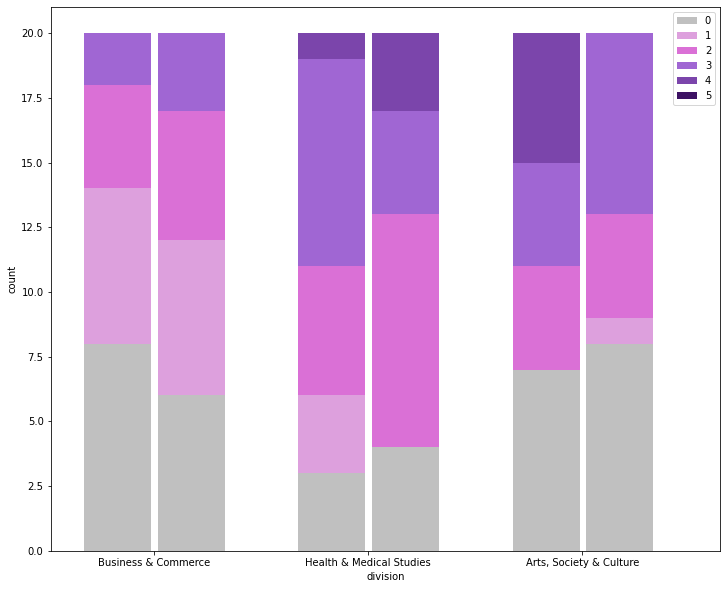

In [18]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cols = draw_df['user'].unique().tolist()
colors = ['#C0C0C0', '#DDA0DD', '#DA70D6', '#A066D3', '#7b45ab', '#3d1163']
width = 0.5

for i, ven_name in enumerate(cols):
    tmp_df = draw_df[draw_df['user'] == ven_name]
    for j in [0, 1]:
        stage_df = tmp_df[tmp_df['stage'] == j]
        old_height = 0
        for rating in range(6):
            height = len(stage_df[stage_df['rate'] == str(rating)])
            plt.bar(i + i*0.6+j*0.55, height,width, bottom=old_height, color=colors[:][rating],
                    label=rating if i == 0 and j==0 else None)
            old_height = old_height + height

plt.xticks([i*1.6+0.27 for i in range(len(cols))], div_list)
plt.xlim((-0.5, 4.5))
plt.ylim((0, 21))
ax.set_xlabel('division')
ax.set_ylabel('count')
plt.legend()
plt.show()


In [22]:
acc_df = new_df.drop_duplicates(['user', 'stage'])[['user', 'stage', 'top3', 'top5', 'top10', 'top15', 'top20']]

In [24]:
acc_df

,user,stage,top3,top5,top10,top15,top20
0,jennytestone,0,66.67%,60.00%,60.00%,60.00%,60.00%
1,jennytestone,1,100.00%,80.00%,70.00%,73.33%,70.00%
2,stagezero,0,100.00%,80.00%,90%,80.00%,85%
3,stagezero,1,66.70%,80.00%,70.00%,73.33%,80.00%
4,robert.b,0,33%,60%,50%,53%,87%
5,robert.b,1,100%,100%,80%,73.33%,60%


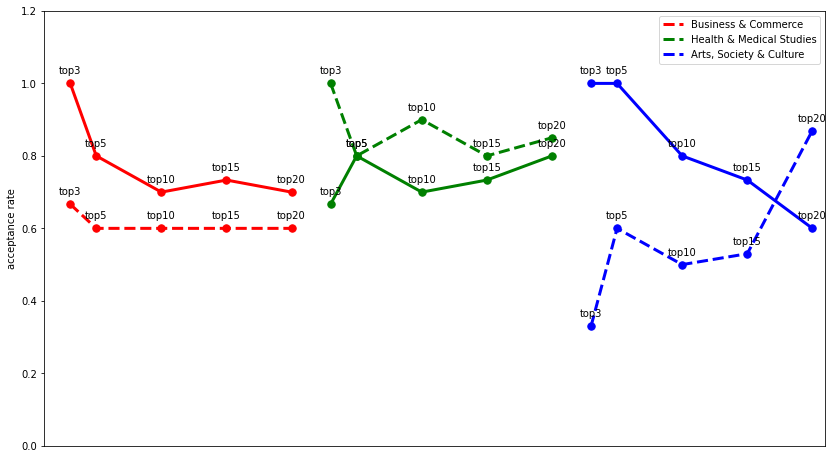

In [39]:
plt.figure(figsize=(14, 8))
colors = ['r', 'g', 'b']
cnt = 0
for i in draw_df['user'].unique():
    tmp_df = acc_df[acc_df['user'] == i]
    for stage in sorted(tmp_df['stage'].unique()):
        value_df = tmp_df[tmp_df['stage'] == stage]
        x = [3+cnt*20, 5+cnt*20 ,10+cnt*20,15+cnt*20,20+cnt*20]
        y = []
        for i in ['top3', 'top5', 'top10', 'top15', 'top20']:
            y.append(float(value_df[i].values[0].replace('%', ''))/100)
        plt.plot(x, y, color = colors[cnt], linewidth=3.0,linestyle='--' if stage==0 else None, label=div_list[cnt] if stage==0 else None)
        plt.scatter(x, y, color = colors[cnt],s=55)
        for i in range(5):
            plt.text(x[i],y[i]+0.02, ['top3', 'top5', 'top10', 'top15', 'top20'][i], ha='center', va='bottom', fontsize=10)
    cnt+=1
    

plt.xticks([])
plt.xlim((1, 61))
plt.ylim((0, 1.2))
plt.ylabel('acceptance rate')
plt.legend()
plt.show()